In [17]:
# import necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import yfinance as yf
from datetime import datetime

In [19]:
income_statement_file = "Pfizer1.csv"
df = pd.read_csv(income_statement_file)

print(f'Original Data Shape: {df.shape}')

# Set first column as index
df = df.set_index("Release Date")

Original Data Shape: (152, 29)


In [20]:
# remove features with more than 40% missing data
df = df.dropna(thresh=df.shape[0]*0.6, axis=1)

In [21]:
df

,Cash & Cash Equivalents,Marketable Securities,Receivables,Inventories,Income taxes - deferred,Other current assets,TOTAL,PPE Net,Investments And Advances,Intangibles,...,Other current liabilities,TOTAL.2,Long Term Debt,Deferred Revenues,Other Non-Current Liabilities,TOTAL.3,Total Liabilities,"Shares Outstanding, K",Common Shares,Retained earnings
Release Date,,,,,,,,,,,,,,,,,,,,,
31-Jan-23,416000,22316000,10952000,8981000,3577000,5017000,51259000,16274000,15069000,94745000,...,22568000,42138000,32884000,2520000,25234000,59149000,101288000,5619075,476000.0,125656000.0
1-Nov-22,1298000,34825000,16076000,9513000,2544000,6147000,70403000,15441000,13888000,77592000,...,19647000,44314000,32629000,6191000,24885000,58145000,102459000,5613315,476000.0,122967000.0
28-Jul-22,1780000,31524000,15155000,10454000,2583000,5970000,67466000,15244000,18962000,78956000,...,23816000,47410000,34294000,3804000,25552000,60410000,107821000,5612352,476000.0,116608000.0
3-May-22,2470000,21427000,13225000,9979000,3117000,4202000,54420000,15109000,20737000,80027000,...,24583000,39268000,35656000,3108000,25570000,61887000,101155000,5610896,476000.0,111193000.0
8-Feb-22,1944000,29125000,11479000,9059000,4266000,3820000,59693000,14882000,21526000,74354000,...,24939000,42671000,36195000,3067000,24800000,61342000,104013000,5623347,473000.0,103394000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,650800,64900,768900,733700,120700,2339000,207500,232600,440100,3936100,...,73100,628300,1721700,16000,1848200,-132900,2180800,3902500,NaN,NaN
NaN,486200,125000,727900,793700,90500,2223300,171100,245600,416700,3781000,...,81400,678000,1742700,7700,1591800,9800,1996600,3739300,NaN,NaN
NaN,422800,144100,750000,848200,95000,2260100,186300,202500,388800,3647100,...,76000,825700,1912100,7500,1396800,200,1697600,3609700,NaN,NaN


In [22]:
# use KNN imputation to fill missing data

In [23]:
vars_with_missing = df.columns[df.isnull().any()].tolist()

# Choose an imputation method
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
df[vars_with_missing] = imputer.fit_transform(df[vars_with_missing])

In [24]:
df

,Cash & Cash Equivalents,Marketable Securities,Receivables,Inventories,Income taxes - deferred,Other current assets,TOTAL,PPE Net,Investments And Advances,Intangibles,...,Other current liabilities,TOTAL.2,Long Term Debt,Deferred Revenues,Other Non-Current Liabilities,TOTAL.3,Total Liabilities,"Shares Outstanding, K",Common Shares,Retained earnings
Release Date,,,,,,,,,,,,,,,,,,,,,
31-Jan-23,416000,22316000,10952000,8981000,3577000,5017000,51259000,16274000,15069000,94745000,...,22568000,42138000,32884000,2520000,25234000,59149000,101288000,5619075,4.760000e+05,1.256560e+08
1-Nov-22,1298000,34825000,16076000,9513000,2544000,6147000,70403000,15441000,13888000,77592000,...,19647000,44314000,32629000,6191000,24885000,58145000,102459000,5613315,4.760000e+05,1.229670e+08
28-Jul-22,1780000,31524000,15155000,10454000,2583000,5970000,67466000,15244000,18962000,78956000,...,23816000,47410000,34294000,3804000,25552000,60410000,107821000,5612352,4.760000e+05,1.166080e+08
3-May-22,2470000,21427000,13225000,9979000,3117000,4202000,54420000,15109000,20737000,80027000,...,24583000,39268000,35656000,3108000,25570000,61887000,101155000,5610896,4.760000e+05,1.111930e+08
8-Feb-22,1944000,29125000,11479000,9059000,4266000,3820000,59693000,14882000,21526000,74354000,...,24939000,42671000,36195000,3067000,24800000,61342000,104013000,5623347,4.730000e+05,1.033940e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,650800,64900,768900,733700,120700,2339000,207500,232600,440100,3936100,...,73100,628300,1721700,16000,1848200,-132900,2180800,3902500,1.079865e+07,5.497695e+07
NaN,486200,125000,727900,793700,90500,2223300,171100,245600,416700,3781000,...,81400,678000,1742700,7700,1591800,9800,1996600,3739300,1.079865e+07,5.497695e+07
NaN,422800,144100,750000,848200,95000,2260100,186300,202500,388800,3647100,...,76000,825700,1912100,7500,1396800,200,1697600,3609700,1.079865e+07,5.497695e+07


In [25]:
# Removed all columns having all 0s
df = df.drop(df.columns[df.eq(0).all()], axis=1)

# Data cleaning by dropping NaN
df = df.dropna(thresh=1)

# Force data column data to be numeric by removing comma
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)

print(f'Cleaned Data Shape: {df.shape}')

Cleaned Data Shape: (152, 25)


In [31]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Set the threshold
threshold = 0.99

# Identify highly correlated features
high_corr_features = np.where(corr_matrix > threshold)

# Remove highly correlated features
high_corr_features = []
for x, y in zip(*high_corr_features): 
    if x != y and x < y:
        col_x_y = (corr_matrix.columns[x], corr_matrix.columns[y]) 
        high_corr_features.append(col_x_y)
        
for feature in high_corr_features:
    df.drop(feature[1], axis=1 ,inplace=True ,errors='ignore')

print(f'Uncorelated Data Shape: {df.shape}')    

Uncorelated Data Shape: (152, 25)


In [32]:
df

,Cash & Cash Equivalents,Marketable Securities,Receivables,Inventories,Income taxes - deferred,Other current assets,TOTAL,PPE Net,Investments And Advances,Intangibles,...,Other current liabilities,TOTAL.2,Long Term Debt,Deferred Revenues,Other Non-Current Liabilities,TOTAL.3,Total Liabilities,"Shares Outstanding, K",Common Shares,Retained earnings
Release Date,,,,,,,,,,,,,,,,,,,,,
31-Jan-23,416000,22316000,10952000,8981000,3577000,5017000,51259000,16274000,15069000,94745000,...,22568000,42138000,32884000,2520000,25234000,59149000,101288000,5619075,4.760000e+05,1.256560e+08
1-Nov-22,1298000,34825000,16076000,9513000,2544000,6147000,70403000,15441000,13888000,77592000,...,19647000,44314000,32629000,6191000,24885000,58145000,102459000,5613315,4.760000e+05,1.229670e+08
28-Jul-22,1780000,31524000,15155000,10454000,2583000,5970000,67466000,15244000,18962000,78956000,...,23816000,47410000,34294000,3804000,25552000,60410000,107821000,5612352,4.760000e+05,1.166080e+08
3-May-22,2470000,21427000,13225000,9979000,3117000,4202000,54420000,15109000,20737000,80027000,...,24583000,39268000,35656000,3108000,25570000,61887000,101155000,5610896,4.760000e+05,1.111930e+08
8-Feb-22,1944000,29125000,11479000,9059000,4266000,3820000,59693000,14882000,21526000,74354000,...,24939000,42671000,36195000,3067000,24800000,61342000,104013000,5623347,4.730000e+05,1.033940e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,650800,64900,768900,733700,120700,2339000,207500,232600,440100,3936100,...,73100,628300,1721700,16000,1848200,-132900,2180800,3902500,1.079865e+07,5.497695e+07
NaN,486200,125000,727900,793700,90500,2223300,171100,245600,416700,3781000,...,81400,678000,1742700,7700,1591800,9800,1996600,3739300,1.079865e+07,5.497695e+07
NaN,422800,144100,750000,848200,95000,2260100,186300,202500,388800,3647100,...,76000,825700,1912100,7500,1396800,200,1697600,3609700,1.079865e+07,5.497695e+07


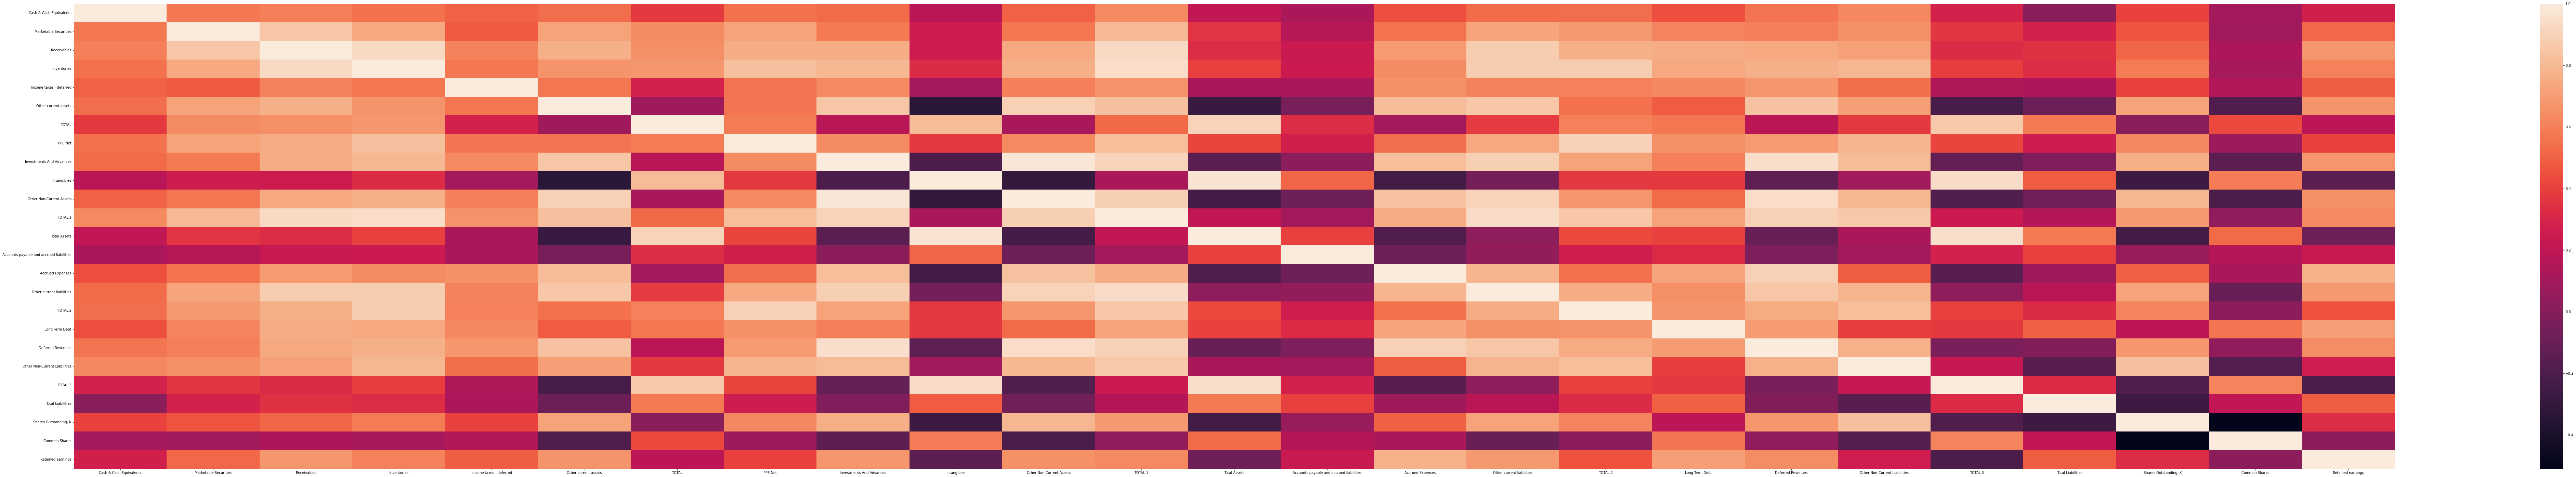

In [27]:
plt.rcParams['figure.figsize'] = df.shape
sns.heatmap(df.corr())
plt.show()

In [28]:

# def get_last_day_price(symbol, quarter, year):
#     quarters = {"Q1":3, "Q2":6, "Q3": 9, "Q4": 12}
#     month = quarters[quarter]
#     year_month = f'{year}-0{month}'
#     start_day = f"{year_month}-21"
#     end_day = f"{year_month}-29"
#     start_day = datetime.strptime(start_day, "%Y-%m-%d")
#     end_day = datetime.strptime(end_day, "%Y-%m-%d")
#     # Download historical data for RELIANCE.NS from 2023-03-01 to 2023-03-31
#     reliance = yf.download("RELIANCE.NS", start=start_day, end=end_day, progress=False)

#     # Calculate the difference between the open and close prices for 2023-03-31
#     last_day_price = reliance.iloc[-1]
#     price_diff = last_day_price['Close'] - last_day_price['Open']
#     # print(last_day_price)
#     # print(f"Price difference: ", price_diff)
#     return price_diff

from datetime import datetime
import yfinance as yf

def get_last_day_price(symbol, quarter, year):
    month_dict = {'Q1':'Mar', 'Q2':'Jun', 'Q3':'Sep', 'Q4':'Dec'}
    year_month = f'{year}-{month_dict[quarter]}'
    last_day = '31' if quarter != 'Q2' else '30'
    start_day = f"{year}-{month_dict[quarter]}-01-21"
    end_day = f"{year_month}-{last_day}-15"
    start_day = datetime.strptime(start_day, "%Y-%b-%d-%H")
    end_day = datetime.strptime(end_day, "%Y-%b-%d-%H")
    ticker = yf.Ticker(symbol)
    data = ticker.history(start=start_day, end=end_day)
    last_day_price = data['Close'][-1]
    return last_day_price




def get_price(df, symbol):
    df_index = df.index.to_list()
    price_dict = {}
    for i in df_index:
        year, month = i.split('-')
        year = f'20{year}' if len(year)==2 else f'200{year}'
        month = 'Q1'
        price = get_last_day_price(symbol, month, year)
        price_dict[i] = price
    # y_df = pd.DataFrame(price_dict)
    y_df = pd.DataFrame.from_dict(price_dict, orient='index', columns=['Price'])
    y_df.index.name = 'Date'
    return y_df
    

In [29]:
symbol = 'RELIANCE.NS'
ydf = get_price(df, symbol)


ValueError: too many values to unpack (expected 2)

In [30]:
df

,Cash & Cash Equivalents,Marketable Securities,Receivables,Inventories,Income taxes - deferred,Other current assets,TOTAL,PPE Net,Investments And Advances,Intangibles,...,Other current liabilities,TOTAL.2,Long Term Debt,Deferred Revenues,Other Non-Current Liabilities,TOTAL.3,Total Liabilities,"Shares Outstanding, K",Common Shares,Retained earnings
Release Date,,,,,,,,,,,,,,,,,,,,,
31-Jan-23,416000,22316000,10952000,8981000,3577000,5017000,51259000,16274000,15069000,94745000,...,22568000,42138000,32884000,2520000,25234000,59149000,101288000,5619075,4.760000e+05,1.256560e+08
1-Nov-22,1298000,34825000,16076000,9513000,2544000,6147000,70403000,15441000,13888000,77592000,...,19647000,44314000,32629000,6191000,24885000,58145000,102459000,5613315,4.760000e+05,1.229670e+08
28-Jul-22,1780000,31524000,15155000,10454000,2583000,5970000,67466000,15244000,18962000,78956000,...,23816000,47410000,34294000,3804000,25552000,60410000,107821000,5612352,4.760000e+05,1.166080e+08
3-May-22,2470000,21427000,13225000,9979000,3117000,4202000,54420000,15109000,20737000,80027000,...,24583000,39268000,35656000,3108000,25570000,61887000,101155000,5610896,4.760000e+05,1.111930e+08
8-Feb-22,1944000,29125000,11479000,9059000,4266000,3820000,59693000,14882000,21526000,74354000,...,24939000,42671000,36195000,3067000,24800000,61342000,104013000,5623347,4.730000e+05,1.033940e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,650800,64900,768900,733700,120700,2339000,207500,232600,440100,3936100,...,73100,628300,1721700,16000,1848200,-132900,2180800,3902500,1.079865e+07,5.497695e+07
NaN,486200,125000,727900,793700,90500,2223300,171100,245600,416700,3781000,...,81400,678000,1742700,7700,1591800,9800,1996600,3739300,1.079865e+07,5.497695e+07
NaN,422800,144100,750000,848200,95000,2260100,186300,202500,388800,3647100,...,76000,825700,1912100,7500,1396800,200,1697600,3609700,1.079865e+07,5.497695e+07


In [162]:
ydf

,Year,Adj Close
0,1,1092.351318
1,2,1326.524170
2,3,855.695740
3,4,635.584290
4,5,502.924377
5,6,388.848816
6,7,434.209503
7,8,356.603333
8,9,342.146454
9,10,474.174866


In [157]:
x = df
y = ydf

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test & Train set results
y_test_pred = regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)




ValueError: Found input variables with inconsistent numbers of samples: [152, 20]

In [158]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(x_train.index, y_train, color='red')
viz_train.plot(x_train.index, y_train_pred, color='blue')
viz_train.title('Stock Price VS Date')
viz_train.xlabel('Date')
viz_train.ylabel('Price')
viz_train.show()



AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [16]:
import requests
from bs4 import BeautifulSoup

# Define the URL of Pfizer's investor relations page
url = 'https://investors.pfizer.com/investor-calendar'

# Make a request to the URL and get the HTML content
response = requests.get(url)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the next earnings release date by looking for the relevant HTML tag and class
release_date = soup.find('div', {'class': 'event-date'}) 

# Print the release date
print(release_date)


None
